<a href="https://colab.research.google.com/github/AnshumaanSingh1999/DataVisualizationProject911CallsAnalysis/blob/main/DataVisualizationReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [4]:
link = 'https://drive.google.com/file/d/1fZGikVsmI_TcXSfQY-ipSRcv-6KFVL_i/view?usp=sharing'
  
import pandas as pd 
  
# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('911.csv')   
  
df = pd.read_csv('911.csv') 
print(df)

              lat        lng  ...                                     addr  e
0       40.297876 -75.581294  ...                   REINDEER CT & DEAD END  1
1       40.258061 -75.264680  ...               BRIAR PATH & WHITEMARSH LN  1
2       40.121182 -75.351975  ...                                 HAWS AVE  1
3       40.116153 -75.343513  ...                       AIRY ST & SWEDE ST  1
4       40.251492 -75.603350  ...                 CHERRYWOOD CT & DEAD END  1
...           ...        ...  ...                                      ... ..
663517  40.157956 -75.348060  ...                SUNSET AVE & WOODLAND AVE  1
663518  40.136306 -75.428697  ...              EAGLEVILLE RD & BUNTING CIR  1
663519  40.013779 -75.300835  ...                     HAVERFORD STATION RD  1
663520  40.121603 -75.351437  ...                   MARSHALL ST & HAWS AVE  1
663521  40.015046 -75.299674  ...  HAVERFORD STATION RD & W MONTGOMERY AVE  1

[663522 rows x 9 columns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [8]:
df['twp'].value_counts()

LOWER MERION       55490
ABINGTON           39947
NORRISTOWN         37633
UPPER MERION       36010
CHELTENHAM         30574
                   ...  
EAST GREENVILLE     1316
BRYN ATHYN          1254
GREEN LANE           385
PHILA COUNTY         267
LEHIGH COUNTY        190
Name: twp, Length: 68, dtype: int64

In [9]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [10]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [11]:
len(df['title'].unique())

148

In [12]:
df['title'].iloc[0]

'EMS: BACK PAINS/INJURY'

In [13]:
x=df['title'].iloc[0]

In [14]:
x.split(':')[0]

'EMS'

In [15]:
df['Reason']=df['title'].apply(lambda title : title.split(':')[0])

In [16]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [17]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

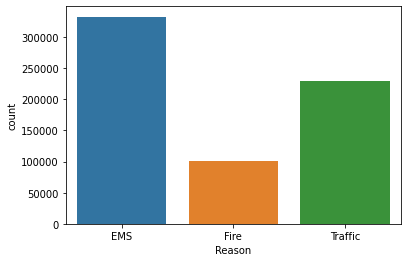

In [18]:
sns.countplot(x='Reason',data=df)

In [19]:
df['timeStamp'].iloc[0]

'2015-12-10 17:10:52'

In [20]:
type(df['timeStamp'].iloc[0])

str

In [22]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [23]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [25]:
time = df['timeStamp'].iloc[0]
time.day

10

In [26]:
time = df['timeStamp'].iloc[0]
time.year

2015

In [27]:
time = df['timeStamp'].iloc[0]
time.dayofweek

3

In [28]:
time = df['timeStamp'].iloc[0]
time.minute

10

In [29]:
time


Timestamp('2015-12-10 17:10:52')

In [30]:
df['Hour']=df['timeStamp'].apply(lambda time : time.hour)

In [31]:
df['Month']=df['timeStamp'].apply(lambda time : time.month)

In [32]:
df['Day of Week']=df['timeStamp'].apply(lambda time : time.dayofweek)

In [33]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   lat          663522 non-null  float64       
 1   lng          663522 non-null  float64       
 2   desc         663522 non-null  object        
 3   zip          583323 non-null  float64       
 4   title        663522 non-null  object        
 5   timeStamp    663522 non-null  datetime64[ns]
 6   twp          663229 non-null  object        
 7   addr         663522 non-null  object        
 8   e            663522 non-null  int64         
 9   Reason       663522 non-null  object        
 10  Hour         663522 non-null  int64         
 11  Month        663522 non-null  int64         
 12  Day of Week  663522 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 65.8+ MB


In [37]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun',}

In [36]:
df['Day of Week']=df['Day of Week'].map(dmap)

In [38]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


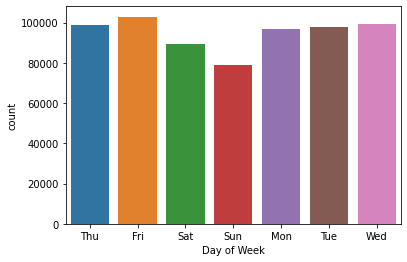

In [39]:
sns.countplot(x='Day of Week',data=df)

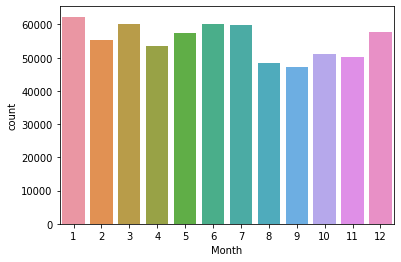

In [40]:
sns.countplot(x='Month',data=df)

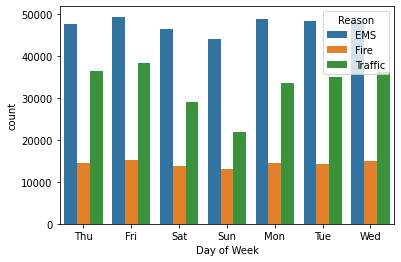

In [41]:
sns.countplot(x='Day of Week',data=df,hue='Reason')

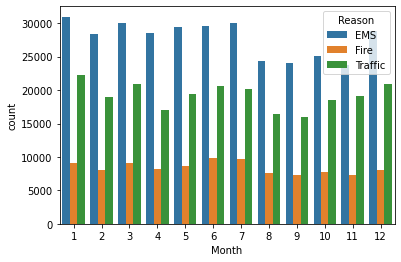

In [42]:
sns.countplot(x='Month',data=df,hue='Reason')

In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   lat          663522 non-null  float64       
 1   lng          663522 non-null  float64       
 2   desc         663522 non-null  object        
 3   zip          583323 non-null  float64       
 4   title        663522 non-null  object        
 5   timeStamp    663522 non-null  datetime64[ns]
 6   twp          663229 non-null  object        
 7   addr         663522 non-null  object        
 8   e            663522 non-null  int64         
 9   Reason       663522 non-null  object        
 10  Hour         663522 non-null  int64         
 11  Month        663522 non-null  int64         
 12  Day of Week  663522 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 65.8+ MB


In [44]:
df.describe()


,lat,lng,zip,e,Hour,Month
count,663522.000000,663522.000000,583323.000000,663522.0,663522.000000,663522.000000
mean,40.158162,-75.300105,19236.055791,1.0,13.044202,6.334414
std,0.220641,1.672884,298.222637,0.0,5.652192,3.475113
min,0.000000,-119.698206,1104.000000,1.0,0.000000,1.000000
25%,40.100344,-75.392735,19038.000000,1.0,9.000000,3.000000
50%,40.143927,-75.305143,19401.000000,1.0,13.000000,6.000000
75%,40.229008,-75.211865,19446.000000,1.0,17.000000,9.000000
max,51.335390,87.854975,77316.000000,1.0,23.000000,12.000000


In [45]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


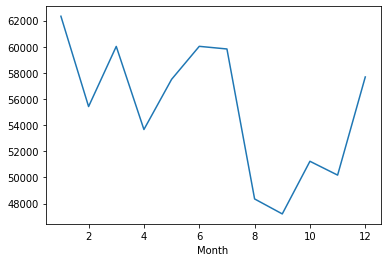

In [46]:
byMonth['lat'].plot()

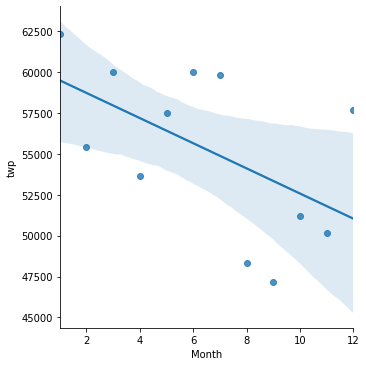

In [48]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [53]:
t = df['timeStamp'].iloc[0]
df['Date']=df['timeStamp'].apply(lambda t:t.date()) 

In [54]:
t.date()

datetime.date(2015, 12, 10)

In [55]:
df.head() 

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


In [56]:
 df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


In [57]:
 df.groupby('Date').count()['lat']

Date
2015-12-10    114
2015-12-11    391
2015-12-12    402
2015-12-13    316
2015-12-14    444
             ... 
2020-07-25    318
2020-07-26    296
2020-07-27    329
2020-07-28    370
2020-07-29    217
Name: lat, Length: 1694, dtype: int64

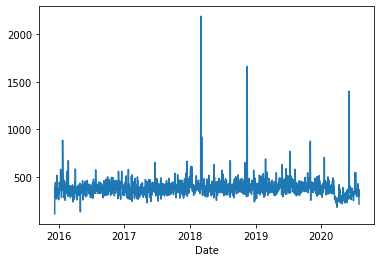

In [59]:
  df.groupby('Date').count()['lat'].plot()

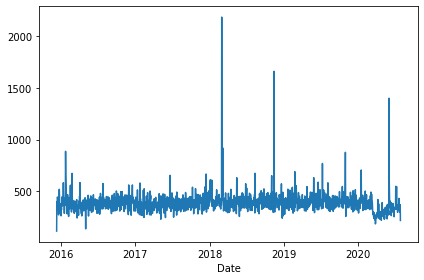

In [79]:
   df.groupby('Date').count()['lat'].plot()
   plt.tight_layout()

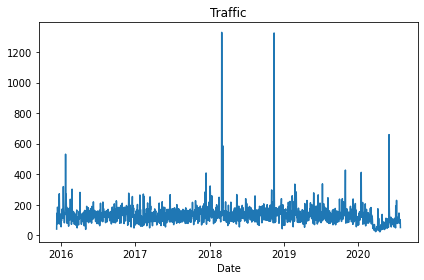

In [81]:
   df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
   plt.title('Traffic')
   plt.tight_layout()

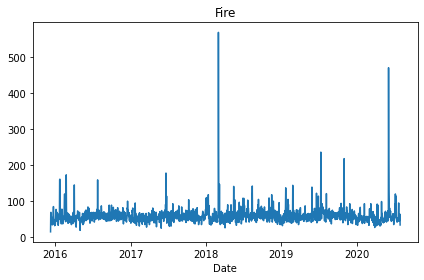

In [83]:
  df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
  plt.title('Fire')
  plt.tight_layout()

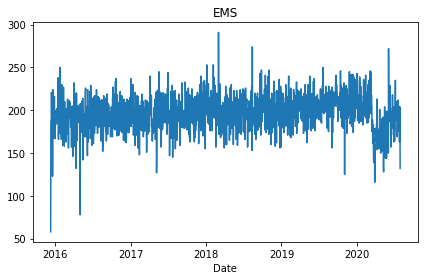

In [84]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

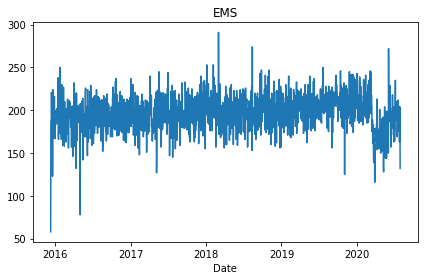

In [85]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')


In [63]:
 df[df['Reason']=='Traffic'].groupby('Date').count()['lat']
 
 

Date
2015-12-10     41
2015-12-11    137
2015-12-12    145
2015-12-13     75
2015-12-14    184
             ... 
2020-07-25     81
2020-07-26     88
2020-07-27     84
2020-07-28    102
2020-07-29     51
Name: lat, Length: 1694, dtype: int64

In [65]:
  df.groupby(by=['Day of Week','Hour']).count()

lat   lng  desc   zip  ...     e  Reason  Month  Date
Day of Week Hour                          ...                           
Fri         0     1983  1983  1983  1752  ...  1983    1983   1983  1983
            1     1635  1635  1635  1451  ...  1635    1635   1635  1635
            2     1449  1449  1449  1311  ...  1449    1449   1449  1449
            3     1296  1296  1296  1173  ...  1296    1296   1296  1296
            4     1339  1339  1339  1227  ...  1339    1339   1339  1339
...                ...   ...   ...   ...  ...   ...     ...    ...   ...
Wed         19    4686  4686  4686  4165  ...  4686    4686   4686  4686
            20    4116  4116  4116  3661  ...  4116    4116   4116  4116
            21    3537  3537  3537  3143  ...  3537    3537   3537  3537
            22    2826  2826  2826  2511  ...  2826    2826   2826  2826
            23    2207  2207  2207  1965  ...  2207    2207   2207  2207

[168 rows x 12 columns]

In [66]:
   df.groupby(by=['Day of Week','Hour']).count()['Reason']

Day of Week  Hour
Fri          0       1983
             1       1635
             2       1449
             3       1296
             4       1339
                     ... 
Wed          19      4686
             20      4116
             21      3537
             22      2826
             23      2207
Name: Reason, Length: 168, dtype: int64

In [67]:
     df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack() 

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,5584,5843,5994,6181,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,5458,5632,5881,5664,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,4944,5450,5555,5378,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,4262,4438,4882,4654,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,5464,5492,5898,6173,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,5498,5582,5795,5794,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,5367,5639,6092,5953,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


In [69]:
dayHour =      df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack() 

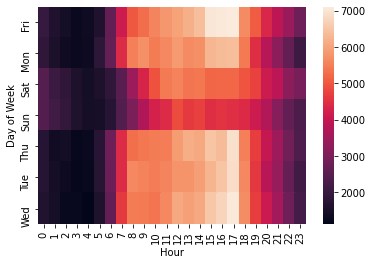

In [70]:
 sns.heatmap(dayHour)

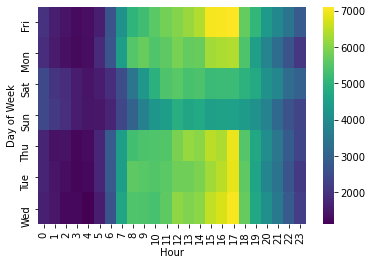

In [72]:
 sns.heatmap(dayHour,cmap='viridis')

In [74]:
 dayMonth =      df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack() 

In [75]:
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


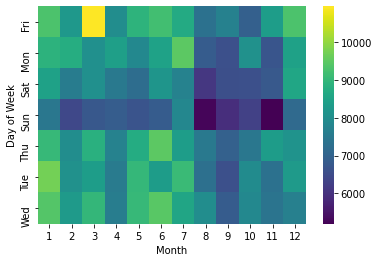

In [76]:
 sns.heatmap(dayMonth,cmap='viridis')

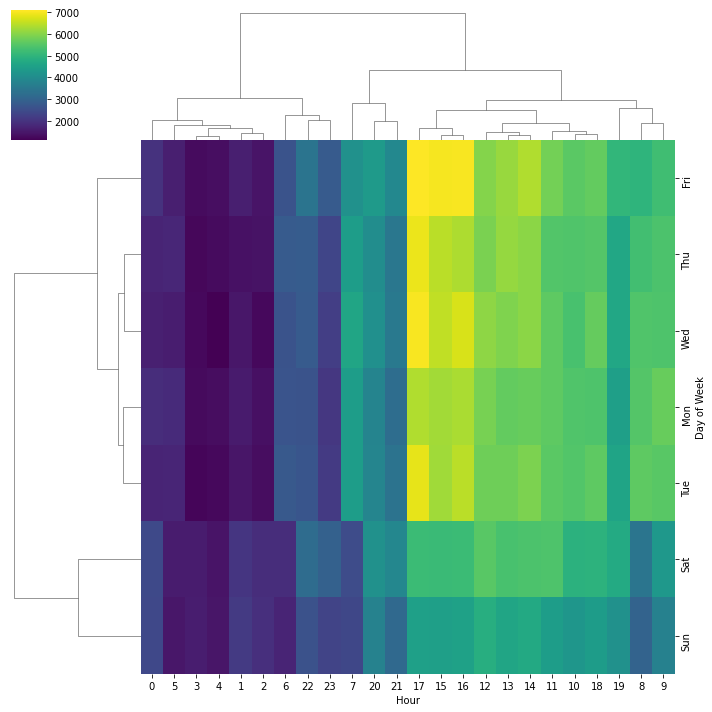

In [77]:
 sns.clustermap(dayHour,cmap='viridis')

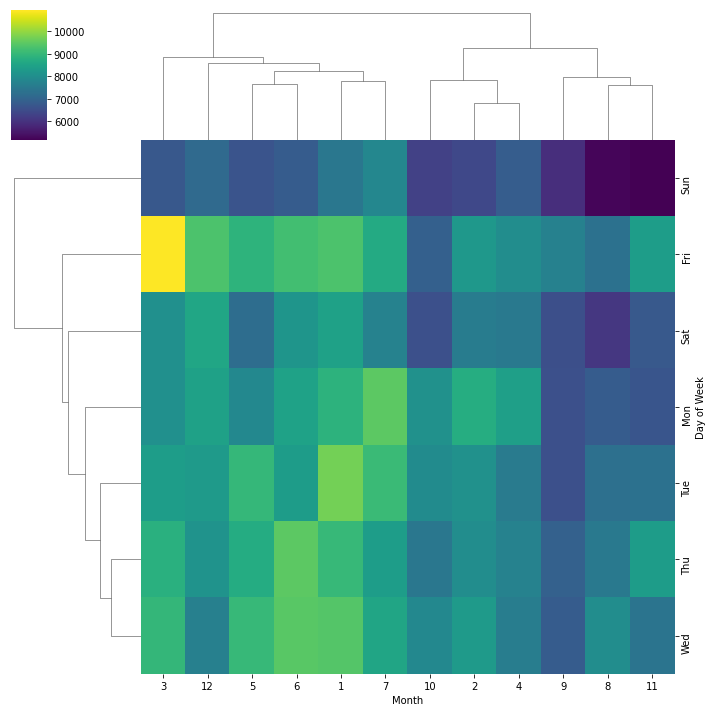

In [78]:
 sns.clustermap(dayMonth,cmap='viridis')